<a href="https://colab.research.google.com/github/msagastya/Practical-Machine-Learning/blob/main/Gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install lime

In [5]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

!pip install shap
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lime
import lime.lime_tabular
from lime import lime_tabular
shap.initjs()

from sklearn.tree import plot_tree

from sklearn.datasets import make_classification
from lime.lime_tabular import LimeTabularExplainer
from sklearn.naive_bayes import GaussianNB, CategoricalNB , MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score ,confusion_matrix,cohen_kappa_score,matthews_corrcoef,precision_recall_curve, auc, roc_curve,average_precision_score
from sklearn.preprocessing import StandardScaler

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,old_peak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.00000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,10.39604,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,11.61075,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.00000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,8.00000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,16.00000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,62.00000,6.200000,2.000000,4.000000,3.000000,1.000000


# Model Training and Evaluation for Gaussian Classifier
Create X and y using a target column and split the dataset into train and test.
Gaussian Classifier on the training set.
Make predictions using a testing set.
Display classification report.
#Training and Testing Set(70:30) ratio

Accuracy: 0.84
Precision: 0.89
Recall: 0.80
F1 Score: 0.84
AUC-ROC Score: 0.84
Confusion Matrix:
[[36  5]
 [10 40]]


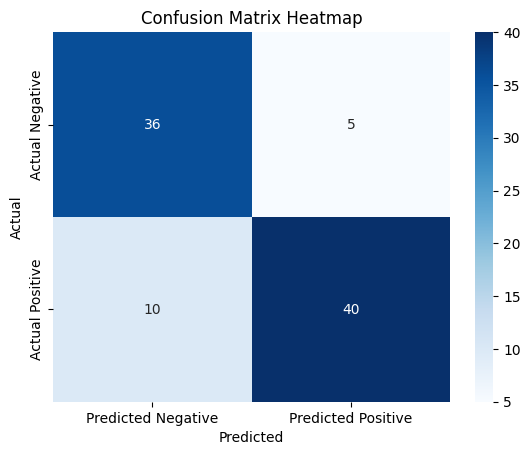

Cohen's Kappa: 0.67
Matthews Correlation Coefficient: 0.67
Precision-Recall AUC: 0.90


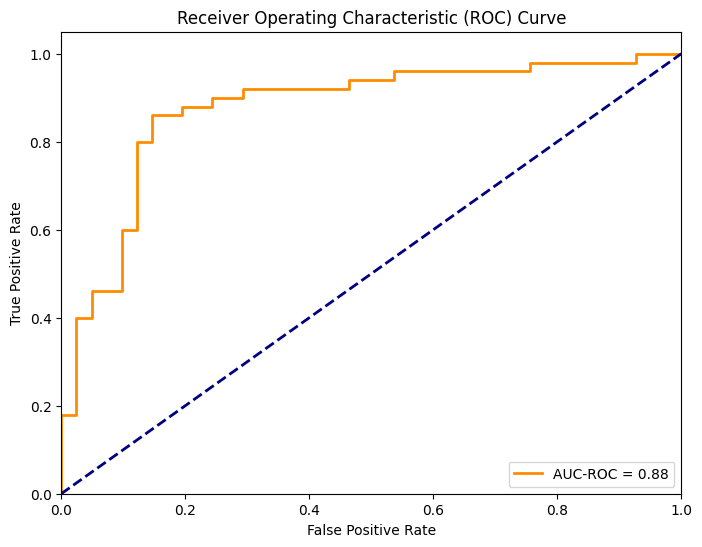

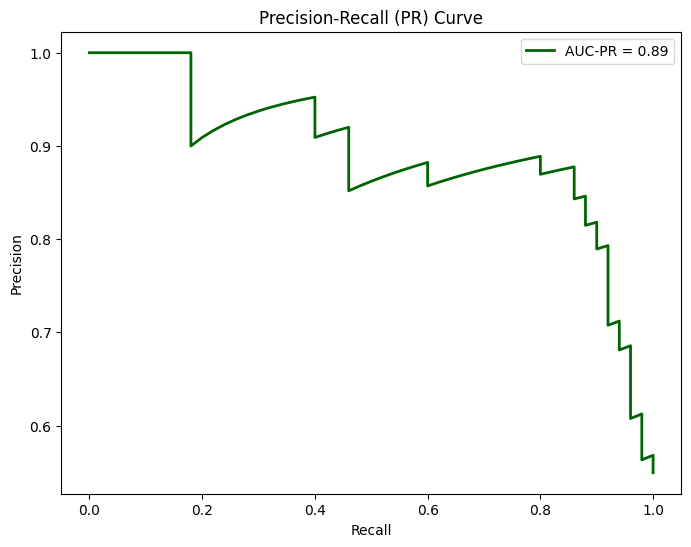

In [18]:


X = data.iloc[:, :-1]
y = data.iloc[:, -1]



X_70train, X_70test, y_70train, y_70test = train_test_split(X, y, test_size=0.3, random_state= 42)



gaussclassifier = GaussianNB()
gaussclassifier.fit(X_70train, y_70train)

# Making predictions

predictions = gaussclassifier.predict(X_70test)

# Calculating accuracy
accuracy = accuracy_score(y_70test, predictions)
print(f"Accuracy: {accuracy:.2f}")
# Calculating precision, recall, and F1 score
precision = precision_score(y_70test, predictions)
recall = recall_score(y_70test, predictions)
f1 = f1_score(y_70test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


auc_roc = roc_auc_score(y_70test, predictions)

print(f"AUC-ROC Score: {auc_roc:.2f}")
conf_matrix = confusion_matrix(y_70test, predictions)


print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Customize the tick labels to match the confusion matrix layout
tick_labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
plt.xticks(ticks=[0.5, 1.5], labels=['Predicted Negative', 'Predicted Positive'])
plt.yticks(ticks=[0.5, 1.5], labels=['Actual Negative', 'Actual Positive'])

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

# Show the plot
plt.show()

kappa = cohen_kappa_score(y_70test, predictions)

print(f"Cohen's Kappa: {kappa:.2f}")
mcc = matthews_corrcoef(y_70test, predictions)

print(f"Matthews Correlation Coefficient: {mcc:.2f}")
precision, recall, _ = precision_recall_curve(y_70test, predictions)

# Calculating AUC for precision-recall curve
pr_auc = auc(recall, precision)

print(f"Precision-Recall AUC: {pr_auc:.2f}")


y_scores = gaussclassifier.predict_proba(X_70test)[:, 1]

# Calculate AUC-ROC
fpr, tpr, _ = roc_curve(y_70test, y_scores)
roc_auc = auc(fpr, tpr)

# Calculate AUC-PR
precision, recall, _ = precision_recall_curve(y_70test, y_scores)
pr_auc = average_precision_score(y_70test, y_scores)

# Plot AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC-ROC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot AUC-PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkgreen', lw=2, label=f'AUC-PR = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='best')
plt.show()

# Training and Testing Set(80:20) ratio

Accuracy: 0.85
Precision: 0.87
Recall: 0.84
F1 Score: 0.86
AUC-ROC Score: 0.85
Precision-Recall AUC: 0.90
Confusion Matrix:
[[25  4]
 [ 5 27]]


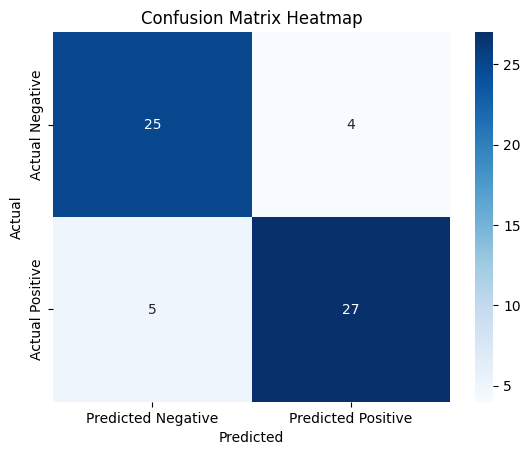

Cohen's Kappa: 0.70
Matthews Correlation Coefficient: 0.71


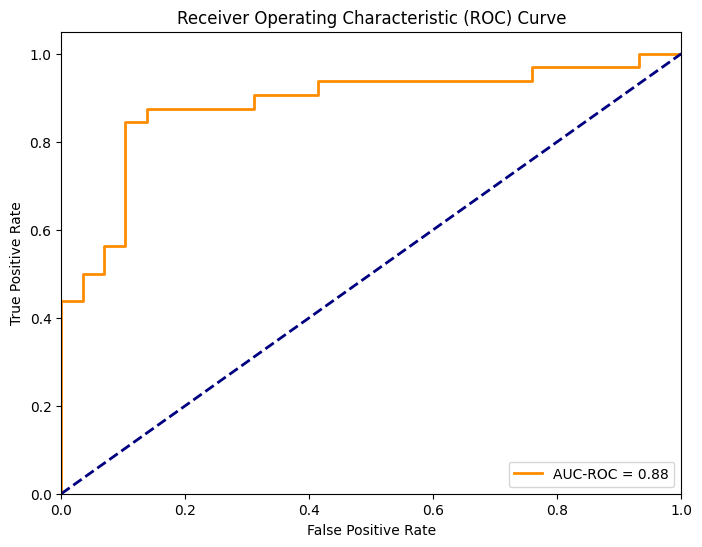

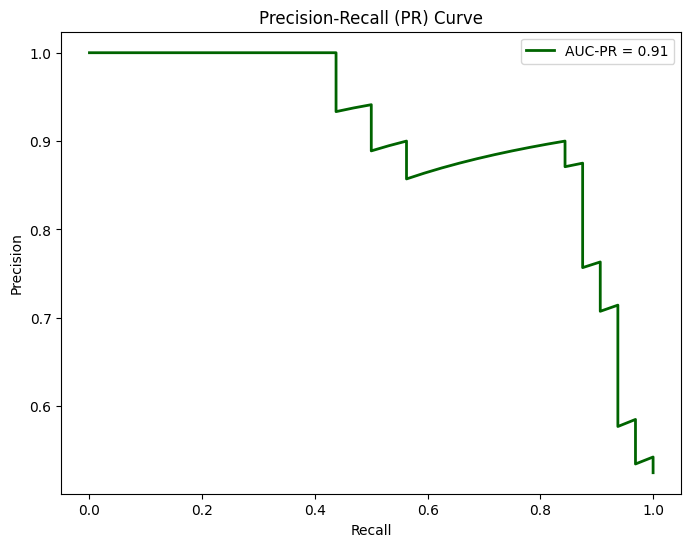

In [8]:


X = data.iloc[:, :-1]
y = data.iloc[:, -1]



X_80train, X_80test, y_80train, y_80test = train_test_split(X, y, test_size=0.2, random_state= 42)



gaussclassifier = GaussianNB()
gaussclassifier.fit(X_80train, y_80train)

# Making predictions

predictions = gaussclassifier.predict(X_80test)

# Calculating accuracy
accuracy = accuracy_score(y_80test, predictions)
print(f"Accuracy: {accuracy:.2f}")
# Calculating precision, recall, and F1 score
precision = precision_score(y_80test, predictions)
recall = recall_score(y_80test, predictions)
f1 = f1_score(y_80test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


auc_roc = roc_auc_score(y_80test, predictions)

print(f"AUC-ROC Score: {auc_roc:.2f}")
conf_matrix = confusion_matrix(y_80test, predictions)

precision, recall, _ = precision_recall_curve(y_80test, predictions)

# Calculating AUC for precision-recall curve
pr_auc = auc(recall, precision)

print(f"Precision-Recall AUC: {pr_auc:.2f}")

print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Customize the tick labels to match the confusion matrix layout
tick_labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
plt.xticks(ticks=[0.5, 1.5], labels=['Predicted Negative', 'Predicted Positive'])
plt.yticks(ticks=[0.5, 1.5], labels=['Actual Negative', 'Actual Positive'])

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

# Show the plot
plt.show()

kappa = cohen_kappa_score(y_80test, predictions)

print(f"Cohen's Kappa: {kappa:.2f}")
mcc = matthews_corrcoef(y_80test, predictions)

print(f"Matthews Correlation Coefficient: {mcc:.2f}")



y_scores = gaussclassifier.predict_proba(X_80test)[:, 1]

# Calculate AUC-ROC
fpr, tpr, _ = roc_curve(y_80test, y_scores)
roc_auc = auc(fpr, tpr)

# Calculate AUC-PR
precision, recall, _ = precision_recall_curve(y_80test, y_scores)
pr_auc = average_precision_score(y_80test, y_scores)

# Plot AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC-ROC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot AUC-PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkgreen', lw=2, label=f'AUC-PR = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='best')
plt.show()

# Training and Testing Set(90:10) ratio

Accuracy: 0.84
Precision: 0.83
Recall: 0.88
F1 Score: 0.86
AUC-ROC Score: 0.83
Confusion Matrix:
[[11  3]
 [ 2 15]]


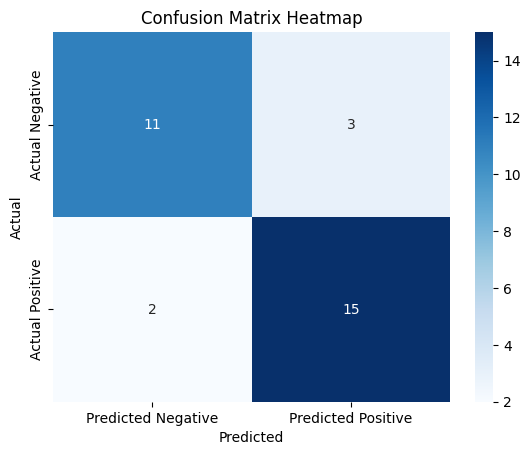

Cohen's Kappa: 0.67
Matthews Correlation Coefficient: 0.67
Precision-Recall AUC: 0.89


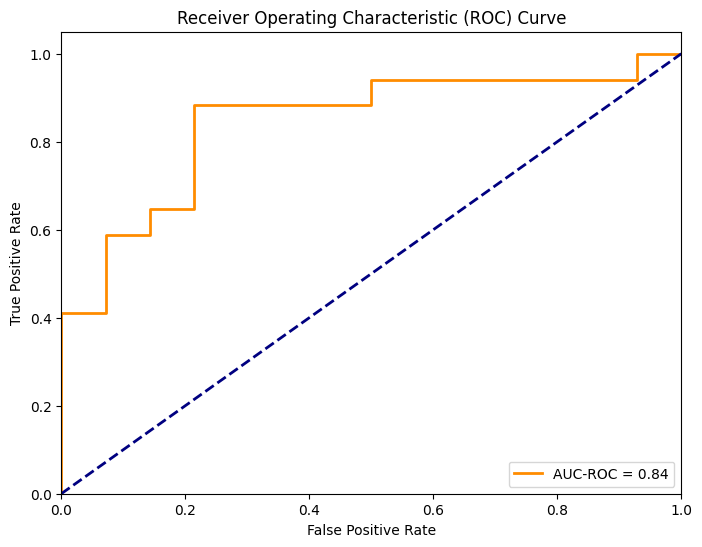

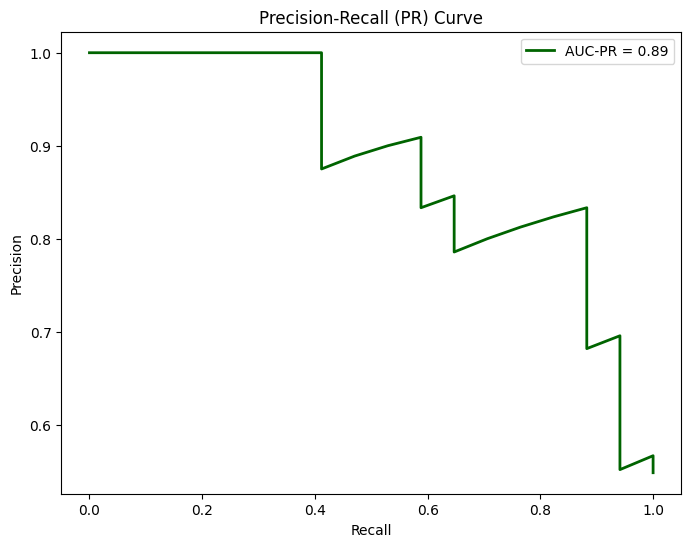

In [9]:


X = data.iloc[:, :-1]
y = data.iloc[:, -1]



X_90train, X_90test, y_90train, y_90test = train_test_split(X, y, test_size=0.1, random_state= 42)



gaussclassifier = GaussianNB()
gaussclassifier.fit(X_90train, y_90train)

# Making predictions

predictions = gaussclassifier.predict(X_90test)

# Calculating accuracy
accuracy = accuracy_score(y_90test, predictions)
print(f"Accuracy: {accuracy:.2f}")
# Calculating precision, recall, and F1 score
precision = precision_score(y_90test, predictions)
recall = recall_score(y_90test, predictions)
f1 = f1_score(y_90test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


auc_roc = roc_auc_score(y_90test, predictions)

print(f"AUC-ROC Score: {auc_roc:.2f}")
conf_matrix = confusion_matrix(y_90test, predictions)


print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Customize the tick labels to match the confusion matrix layout
tick_labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
plt.xticks(ticks=[0.5, 1.5], labels=['Predicted Negative', 'Predicted Positive'])
plt.yticks(ticks=[0.5, 1.5], labels=['Actual Negative', 'Actual Positive'])

# Add labels and a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

# Show the plot
plt.show()

kappa = cohen_kappa_score(y_90test, predictions)

print(f"Cohen's Kappa: {kappa:.2f}")
mcc = matthews_corrcoef(y_90test, predictions)

print(f"Matthews Correlation Coefficient: {mcc:.2f}")
precision, recall, _ = precision_recall_curve(y_90test, predictions)

# Calculating AUC for precision-recall curve
pr_auc = auc(recall, precision)

print(f"Precision-Recall AUC: {pr_auc:.2f}")


y_scores = gaussclassifier.predict_proba(X_90test)[:, 1]

# Calculate AUC-ROC
fpr, tpr, _ = roc_curve(y_90test, y_scores)
roc_auc = auc(fpr, tpr)

# Calculate AUC-PR
precision, recall, _ = precision_recall_curve(y_90test, y_scores)
pr_auc = average_precision_score(y_90test, y_scores)

# Plot AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC-ROC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot AUC-PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkgreen', lw=2, label=f'AUC-PR = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='best')
plt.show()

# Correaltion Matrix Heatmap

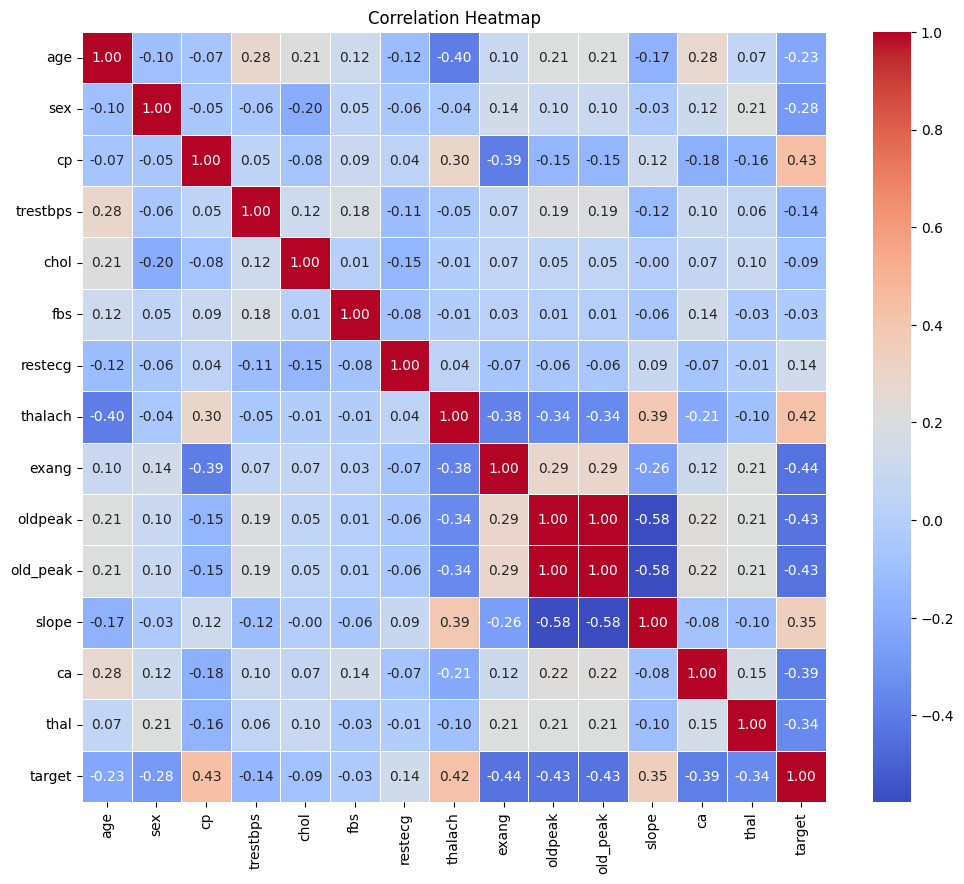

In [10]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Customize the plot
plt.title('Correlation Heatmap')
plt.show()




# Variable Importance plot

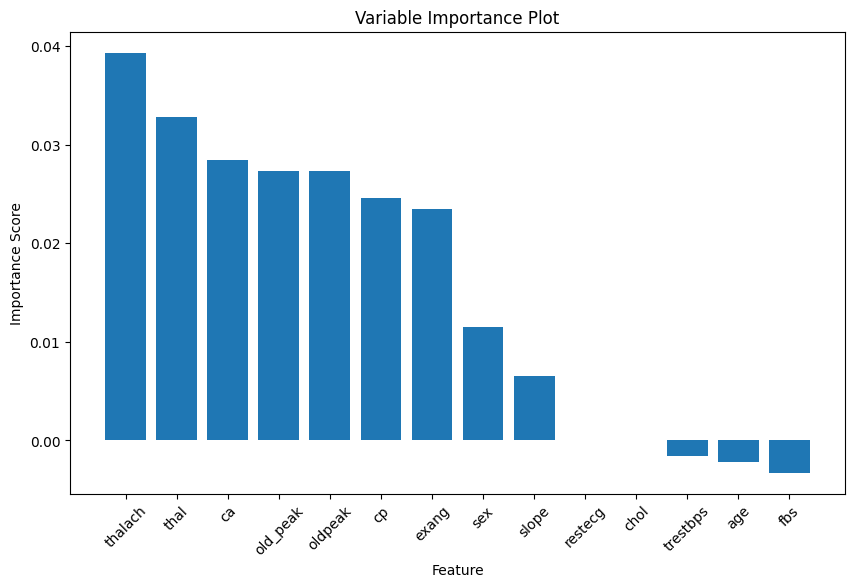

In [11]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
result = permutation_importance(gaussclassifier, X_80test, y_80test, n_repeats=30, random_state=42)

# Get feature importances and names
importances = result.importances_mean
feature_names = X_80test.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot variable importance
plt.figure(figsize=(10, 6))
plt.bar(range(X_80test.shape[1]), importances[indices], align="center")
plt.xticks(range(X_80test.shape[1]), feature_names[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Variable Importance Plot")
plt.show()


# Decision Boundary for Naive Bayes
Visualize the decision boundaries created by the Naive Bayes classifier. This can help you understand how the model separates different classes in feature space.

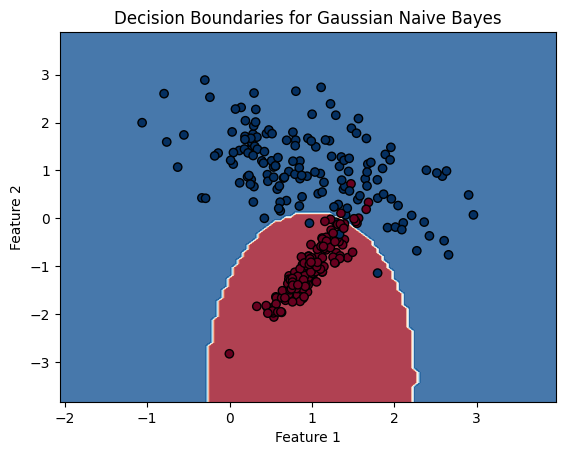

In [12]:
X, y = make_classification(n_samples=300, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Create a Gaussian Naive Bayes classifier
gaussclassifier = GaussianNB()
gaussclassifier.fit(X, y)

# Define a meshgrid to create a 2D feature space
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Predict class labels for each point in the meshgrid
Z = gaussclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

# Plot the original data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolor='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries for Gaussian Naive Bayes')
plt.show()

# Feature Importance
Feature importance quantifies the relevance of individual features in a machine learning model's predictions. It indicates which features have the most influence on the model's output. Higher feature importance suggests that changing that feature's values has a greater impact on the model's predictions, making it crucial for understanding the model's behavior and potentially for feature selection.

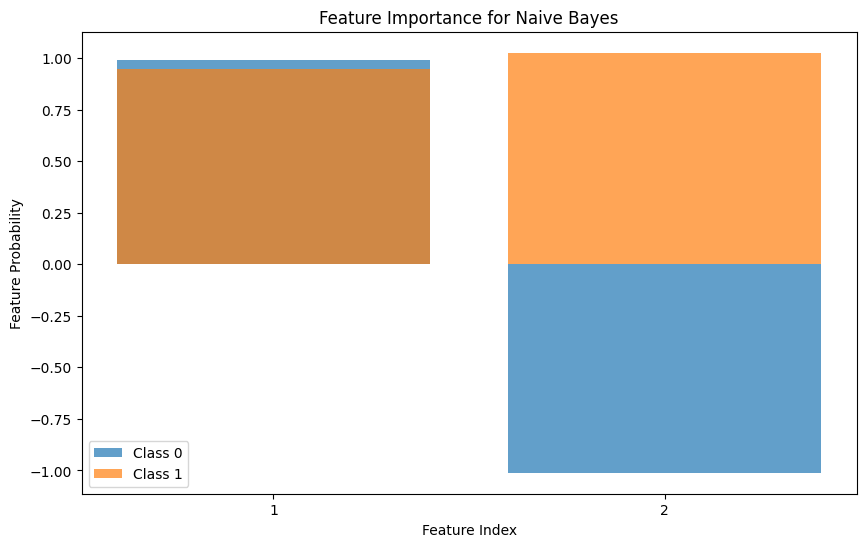

In [13]:
class_probabilities = gaussclassifier.theta_

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), class_probabilities[0], label='Class 0', alpha=0.7)
plt.bar(range(X.shape[1]), class_probabilities[1], label='Class 1', alpha=0.7)

plt.xlabel('Feature Index')
plt.ylabel('Feature Probability')
plt.xticks(range(X.shape[1]), range(1, X.shape[1] + 1))
plt.title('Feature Importance for Naive Bayes')
plt.legend()
plt.show()

# Class Probabilty Distribution
Plot the class probability distributions for each feature. This can help you understand how feature values are distributed for each class, and which features are more informative for distinguishing between classes.

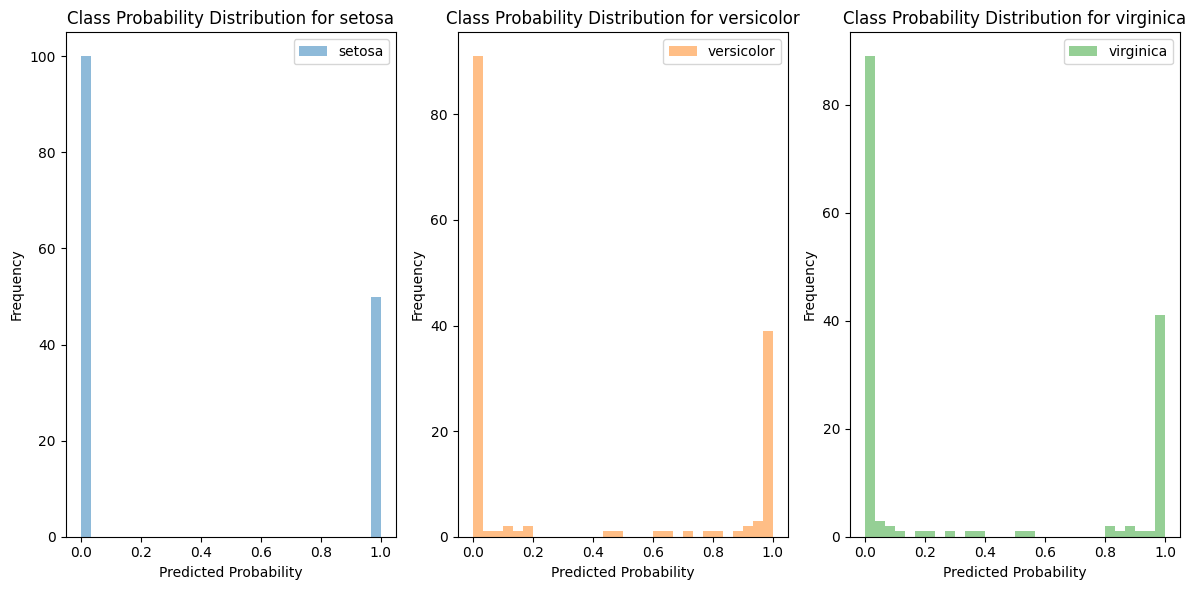

In [14]:
data = load_iris()
X, y = data.data, data.target

# Create a Gaussian Naive Bayes classifier
gaussclassifier = GaussianNB()
gaussclassifier.fit(X, y)

# Predict class probabilities for each data point
class_probabilities = gaussclassifier.predict_proba(X)

# Plot class probability distributions
plt.figure(figsize=(12, 6))

# Loop through each class
for class_index, class_name in enumerate(data.target_names):
    plt.subplot(1, 3, class_index + 1)
    plt.hist(class_probabilities[:, class_index], bins=30, alpha=0.5, label=class_name, color='C{}'.format(class_index))
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title(f'Class Probability Distribution for {class_name}')
    plt.legend()

plt.tight_layout()
plt.show()

# Partial Probability Distribution
PDPs show how the predicted probability for a specific class changes as a single feature's value varies while holding all other features constant. This can help you understand the relationship between individual features and class probabilities.

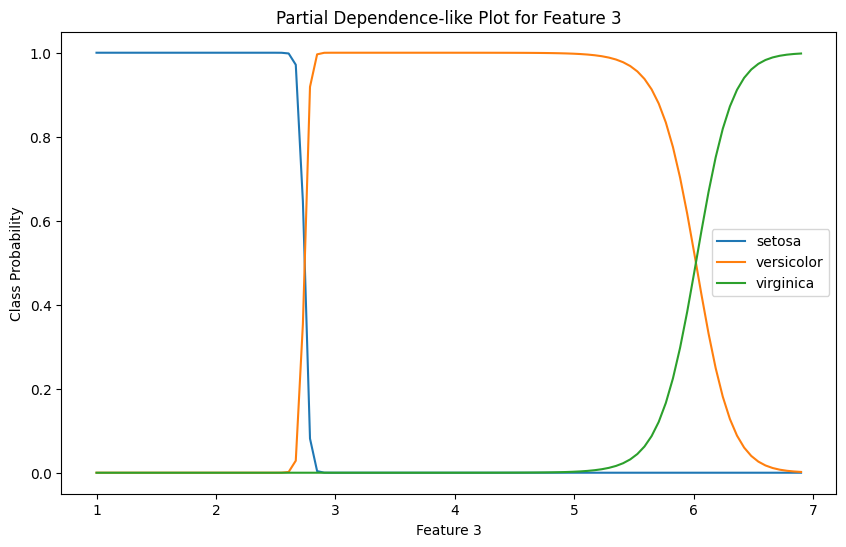

In [15]:
data = load_iris()
X, y = data.data, data.target

# Create a Gaussian Naive Bayes classifier
gaussclassifier = GaussianNB()
gaussclassifier.fit(X, y)

# Define the feature for which you want to create the "PDP"
feature_index = 2  # Change this to the index of the feature you want to analyze

# Create an array of feature values to vary
feature_values = np.linspace(X[:, feature_index].min(), X[:, feature_index].max(), num=100)

# Initialize arrays to store class probabilities
class_probabilities = np.zeros((len(feature_values), len(data.target_names)))

# Vary the selected feature and calculate class probabilities
for i, value in enumerate(feature_values):
    X_temp = X.copy()
    X_temp[:, feature_index] = value
    class_probabilities[i, :] = gaussclassifier.predict_proba(X_temp)[0]

# Plot the class probabilities against the feature values
plt.figure(figsize=(10, 6))
for class_index, class_name in enumerate(data.target_names):
    plt.plot(feature_values, class_probabilities[:, class_index], label=class_name)

plt.xlabel(f'Feature {feature_index + 1}')
plt.ylabel('Class Probability')
plt.title(f'Partial Dependence-like Plot for Feature {feature_index + 1}')
plt.legend()
plt.show()

#SHAP Values in Machine Learning
SHAP values are a common way of getting a consistent and objective explanation of how each feature impacts the model's prediction.
# Implementation of  SHAP Values for 70 : 30 ratio(Training and Testing)

# Summary Plot
The summary plot shows the feature importance of each feature in the model. The results show that “Status,” “Complaints,” and “Frequency of use” play major roles in determining the results.

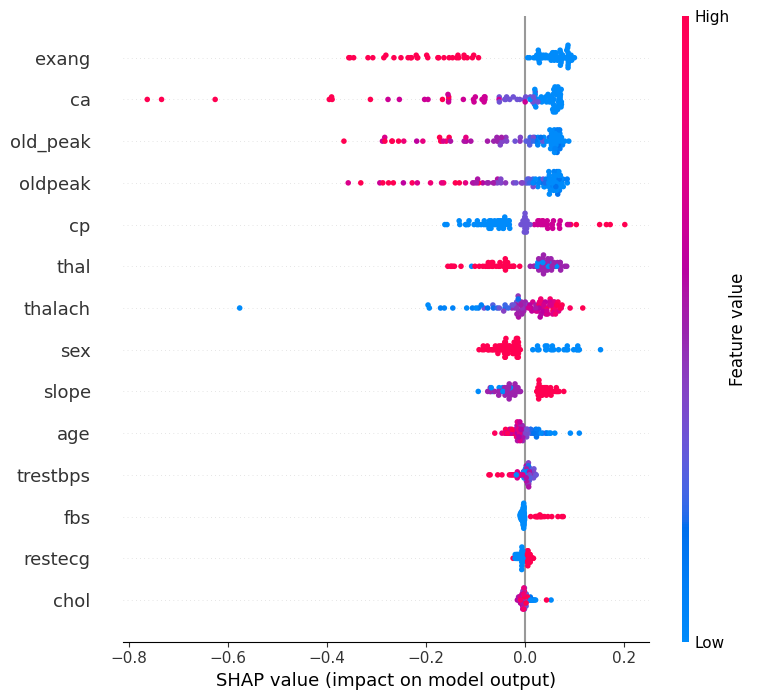

In [19]:
def model_predict(X):
    return gaussclassifier.predict_proba(X)[:, 1]  # Assuming you want probability for the positive class

# Create a SHAP explainer using the callable model_predict function
explainer = shap.Explainer(model_predict, X_70train)

# Compute SHAP values
shap_values = explainer.shap_values(X_70test)

# Create a summary plot
shap.summary_plot(shap_values, X_70test)


# Dependence Plot
A dependence plot is a type of scatter plot that displays how a model's predictions are affected by a specific feature (Subscription Length). On average, subscription lengths have a mostly positive effect on the model.



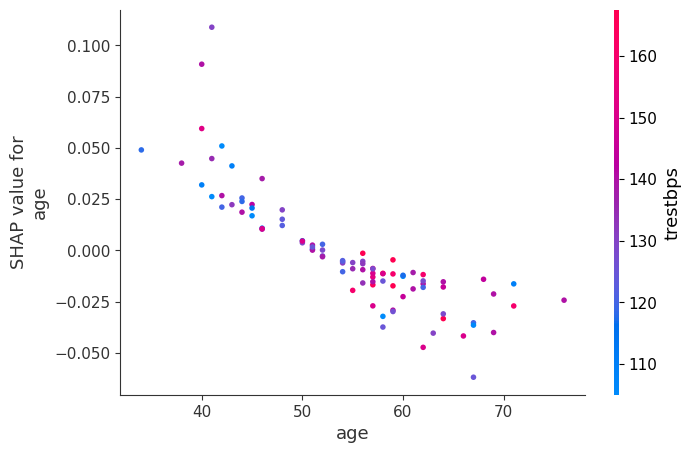

In [20]:
feature_to_plot = 'age'  # Change this to the feature you want to visualize

# Create the dependence plot
shap.dependence_plot(feature_to_plot, shap_values, X_70test)

# LIME(Local Interpretable Model-agnostic Explanations)
Local Interpretable Model-agnostic Explanations (LIME for short). Instead of providing a global understanding of the model on the entire dataset, LIME focuses on explaining the model’s prediction for individual instances.

LIME explainer can be set up using two main steps: (1) import the lime module, and (2) fit the explainer using the training data and the targets. During this phase, the mode is set to classification, which corresponds to the task being performed.

X does not have valid feature names, but GaussianNB was fitted with feature names


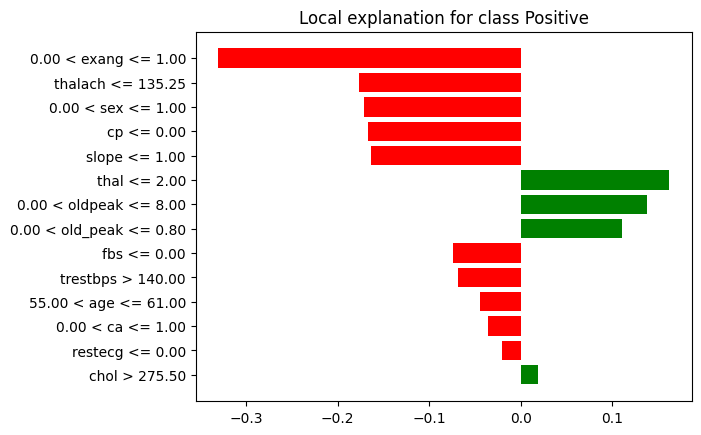

In [21]:
# Import the LimeTabularExplainer module


# Get the class names
class_names = ['Has diabetes', 'No diabetes']

# Get the feature names
feature_names = list(X_70train.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer


explainer = lime_tabular.LimeTabularExplainer(X_70train.values,
                                              mode='classification',
                                              feature_names=X_70train.columns,
                                              class_names=['Negative', 'Positive'],
                                              discretize_continuous=True)

# Select a sample for which you want to explain predictions
sample_idx = 0  # You can change this index as needed
sample = X_80test.iloc[sample_idx]

# Explain the prediction
exp = explainer.explain_instance(sample.values, gaussclassifier.predict_proba, num_features=len(X_70train.columns))

# Plot the explanation
fig = exp.as_pyplot_figure()
plt.show()



# Implementation of Shap values for 80 :20 ratio (Training and Testing)
# Summary plot

In [ ]:
def model_predict(X):
    return gaussclassifier.predict_proba(X)[:, 1]  # Assuming you want probability for the positive class

# Create a SHAP explainer using the callable model_predict function
explainer = shap.Explainer(model_predict, X_80train)

# Compute SHAP values
shap_values = explainer.shap_values(X_80test)

# Create a summary plot
shap.summary_plot(shap_values, X_80test)

# Depenedence Plot

In [ ]:
feature_to_plot = 'age'  # Change this to the feature you want to visualize

# Create the dependence plot
shap.dependence_plot(feature_to_plot, shap_values, X_80test)

# LIME(Local Interpretable Model-agnostic Explanations)

In [ ]:
# Import the LimeTabularExplainer module


# Get the class names
class_names = ['Has diabetes', 'No diabetes']

# Get the feature names
feature_names = list(X_80train.columns)

# # Fit the Explainer on the training data set using the LimeTabularExplainer
# explainer = LimeTabularExplainer(X_80train.values, feature_names =
#                                  feature_names,
#                                  class_names = class_names,
#                                  mode = 'classification')

explainer = lime_tabular.LimeTabularExplainer(X_80train.values,
                                              mode='classification',
                                              feature_names=X_80train.columns,
                                              class_names=['Negative', 'Positive'],
                                              discretize_continuous=True)

# Select a sample for which you want to explain predictions
sample_idx = 0  # You can change this index as needed
sample = X_80test.iloc[sample_idx]

# Explain the prediction
exp = explainer.explain_instance(sample.values, gaussclassifier.predict_proba, num_features=len(X_80train.columns))

# Plot the explanation
fig = exp.as_pyplot_figure()
plt.show()

# Implementation of Shap value for 90 : 10 ratio (Training and Testing)
# Summary Plot

In [ ]:
def model_predict(X):
    return gaussclassifier.predict_proba(X)[:, 1]  # Assuming you want probability for the positive class

# Create a SHAP explainer using the callable model_predict function
explainer = shap.Explainer(model_predict, X_90train)

# Compute SHAP values
shap_values = explainer.shap_values(X_90test)

# Create a summary plot
shap.summary_plot(shap_values, X_90test)

# Depenedence Plot

In [ ]:
feature_to_plot = 'age'  # Change this to the feature you want to visualize

# Create the dependence plot
shap.dependence_plot(feature_to_plot, shap_values, X_90test)

# LIME(Local Interpretable Model-agnostic Explanations)

In [ ]:
# Import the LimeTabularExplainer module


# Get the class names
class_names = ['Has diabetes', 'No diabetes']

# Get the feature names
feature_names = list(X_90train.columns)

explainer = lime_tabular.LimeTabularExplainer(X_90train.values,
                                              mode='classification',
                                              feature_names=X_90train.columns,
                                              class_names=['Negative', 'Positive'],
                                              discretize_continuous=True)

# Select a sample for which you want to explain predictions
sample_idx = 0  # You can change this index as needed
sample = X_80test.iloc[sample_idx]

# Explain the prediction
exp = explainer.explain_instance(sample.values, gaussclassifier.predict_proba, num_features=len(X_90train.columns))

# Plot the explanation
fig = exp.as_pyplot_figure()
plt.show()